# Analyse des logs du système de dessin assisté par IA Sketch Helper

Membres du groupe :

- **Elisa LI**
- **Nathan NYABANGANG JOKÉ TIMBA**
- **William SARDON ARRAZ**

Ce notebook présente l’analyse des données issues d’un prototype d’application de dessin
permettant de comparer une activité de création graphique **avec** et **sans assistance par intelligence artificielle (IA)**.

L’objectif général du projet est d’évaluer l’impact de différentes formes d’assistance IA
(suggestions automatiques, assistant contextuel, génération d’éléments graphiques)
sur la réalisation de tâches de dessin guidées.

## Contexte expérimental

Les participants utilisent une application de dessin pour reproduire **trois dessins successifs** :
1. un chat,
2. un château,
3. une voiture.

Pour chaque dessin :
- un exemple à reproduire est affiché dans une fenêtre secondaire ;
- l’utilisateur dessine librement dans l’éditeur principal ;
- lorsqu’il estime le dessin terminé, il clique sur un bouton *Done* ;
- il renseigne ensuite une **auto-évaluation subjective de ressemblance** via un slider.

Les trois tâches sont réalisées dans un ordre fixe (chat → château → voiture).

## Conditions expérimentales

Deux conditions expérimentales sont comparées :

- **Sans IA (H_ONLY)** :  
  l’utilisateur dispose uniquement des outils classiques de dessin
  (stylo, formes, sélection, suppression, etc.).

- **Avec IA (H_PLUS_IA)** :  
  l’utilisateur a accès à plusieurs fonctionnalités d’assistance :
  - un assistant contextuel,
  - des suggestions automatiques,
  - un module de génération d’éléments graphiques par IA.

Chaque participant est affecté à **une seule condition expérimentale**.

## Objectifs de l’analyse

L’analyse vise à déterminer si l’assistance par IA :

- permet de **réduire le temps de réalisation** des dessins ;
- modifie le **comportement de dessin** des utilisateurs
  (en particulier les actions de correction) ;
- est **utilisée différemment selon le type de tâche** proposée.

Pour cela, nous exploitons les logs événementiels produits par l’application
lors de l’exécution des sessions de dessin.

## Questions de recherche

Cette analyse s’articule autour des questions de recherche suivantes :

- **RQ1** : l’assistance par IA permet-elle de réduire le temps nécessaire
  pour réaliser une tâche de dessin ?

- **RQ2** : l’assistance par IA modifie-t-elle le comportement de dessin,
  notamment en réduisant le nombre de corrections effectuées ?

- **RQ3** : l’usage de l’IA varie-t-il en fonction de la tâche
  (chat, château, voiture) ?

# Hypothèses expérimentales

À partir des objectifs du projet et des questions de recherche formulées précédemment,
nous définissons un ensemble d’hypothèses expérimentales visant à évaluer l’impact
de l’assistance par intelligence artificielle (IA) sur la réalisation de tâches de dessin.

Chaque hypothèse est associée à des variables observables issues des logs
et sera testée à l’aide d’analyses statistiques appropriées dans les sections suivantes.

## H1 – Hypothèse descriptive (efficacité temporelle)

**H1** : le temps de réalisation d’un dessin est plus faible lorsque l’utilisateur
dispose d’une assistance par IA que lorsqu’il n’en dispose pas.

- **Variable indépendante (VI)** :  
  condition expérimentale (*Sans IA* vs *Avec IA*).

- **Variable dépendante (VD)** :  
  durée de réalisation d’un essai, mesurée en secondes.

- **Attente théorique** :  
  l’assistance par IA facilite certaines étapes de la production graphique,
  ce qui se traduit par une réduction du temps nécessaire pour finaliser un dessin.

## H2 – Hypothèse comportementale (corrections)

**H2** : le nombre de corrections effectuées lors de la réalisation d’un dessin
est plus faible lorsque l’utilisateur dispose d’une assistance par IA.

- **Variable indépendante (VI)** :  
  condition expérimentale (*Sans IA* vs *Avec IA*).

- **Variable dépendante (VD)** :  
  nombre d’actions de correction effectuées au cours d’un essai.

- **Attente théorique** :  
  l’assistance par IA permettrait de guider l’utilisateur vers des tracés plus
  adaptés dès les premières tentatives, réduisant ainsi le besoin de modifier
  ou d’annuler des actions précédentes.

## H3 – Hypothèse d’interaction (usage de l’IA selon la tâche)

**H3** : l’assistance par IA n’est pas utilisée de la même manière selon le type
de tâche de dessin proposé.

- **Variable indépendante (VI)** :  
  type de tâche (*chat*, *château*, *voiture*).

- **Variable dépendante (VD)** :  
  indicateurs d’usage de l’IA au cours d’un essai
  (par exemple : nombre d’éléments générés par IA ou utilisation effective de l’IA).

- **Attente théorique** :  
  certaines tâches, plus structurées ou composées d’éléments répétitifs,
  pourraient inciter davantage à recourir aux fonctionnalités d’assistance par IA
  que d’autres tâches plus "détaillées".

## Synthèse des hypothèses

Les hypothèses formulées couvrent trois dimensions complémentaires :

- **H1** porte sur l’efficacité globale de la tâche (temps de réalisation) ;
- **H2** porte sur le comportement de l’utilisateur lors du dessin
  (actions de correction) ;
- **H3** porte sur l’interaction entre l’utilisateur, l’IA et le type de tâche.

Les sections suivantes détaillent la manière dont ces hypothèses sont
opérationnalisées à partir des logs et testées statistiquement.

# Données et schéma des logs

Cette section décrit les données collectées lors de l’expérimentation,
leur structure générale, ainsi que les types d’événements enregistrés par l’application.

Les données analysées proviennent de fichiers de logs au format CSV,
dans lesquels chaque ligne correspond à un **événement horodaté**
survenu lors d’une session utilisateur.

In [33]:
import pandas as pd

# Chargement du fichier de logs principal
df = pd.read_csv("logs/events_all.csv")

# Conversion du timestamp si nécessaire
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Tri chronologique par session
df = df.sort_values(["session_id", "timestamp"])

df.head()

,timestamp,session_id,condition,task_id,trial_index,event_type,tool,item_type,n_points,notes
2254,2026-01-20 11:00:04.188694,0cb582a3-2753-47ef-96ad-5fad4d0514f4,NaN,NaN,NaN,stroke_color_change,NaN,NaN,NaN,NaN
2255,2026-01-20 11:00:04.190367,0cb582a3-2753-47ef-96ad-5fad4d0514f4,NaN,NaN,NaN,fill_color_change,NaN,NaN,NaN,NaN
2256,2026-01-20 11:00:12.558289,0cb582a3-2753-47ef-96ad-5fad4d0514f4,H_PLUS_IA,NaN,NaN,test_start,NaN,NaN,NaN,condition=H_PLUS_IA;3_tasks_fixed_order
2257,2026-01-20 11:00:12.559492,0cb582a3-2753-47ef-96ad-5fad4d0514f4,H_PLUS_IA,cat,1.0,trial_start,NaN,NaN,NaN,task=cat
2258,2026-01-20 11:00:18.342778,0cb582a3-2753-47ef-96ad-5fad4d0514f4,H_PLUS_IA,cat,1.0,tool_change,ELLIPSE,NaN,NaN,NaN


## Volume et granularité des données

Les logs sont enregistrés à un niveau **événementiel** :
chaque interaction significative de l’utilisateur avec l’application
donne lieu à l’enregistrement d’une ligne dans le fichier de logs.

Ainsi :
- une session utilisateur contient plusieurs centaines d’événements ;
- chaque session est composée de plusieurs essais (*trials*) ;
- les analyses nécessitent une **agrégation** des événements
  afin d’obtenir des métriques interprétables au niveau de l’essai
  ou de la session.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 2254 to 1088
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    3001 non-null   datetime64[ns]
 1   session_id   3001 non-null   object        
 2   condition    2960 non-null   object        
 3   task_id      2901 non-null   object        
 4   trial_index  2901 non-null   float64       
 5   event_type   3001 non-null   object        
 6   tool         2477 non-null   object        
 7   item_type    770 non-null    object        
 8   n_points     48 non-null     float64       
 9   notes        950 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 257.9+ KB


## Sessions et essais

Chaque participant correspond à une **session** identifiée par un identifiant unique
(`session_id`).

Au sein d’une session :
- l’utilisateur réalise trois essais successifs (*trials*) ;
- chaque essai correspond à la reproduction d’un dessin spécifique
  (*chat*, *château* ou *voiture*) ;
- les essais sont délimités par des événements de début et de fin
  explicitement enregistrés dans les logs.

## Événements structurants

Certains types d’événements jouent un rôle structurant dans les logs :

- `trial_start` : début d’un essai ;
- `trial_end` : fin d’un essai (incluant la durée totale) ;
- `done_clicked` : validation explicite par l’utilisateur
  de la fin de son dessin.

Ces événements permettent de segmenter les logs événementiels
en essais distincts, qui constituent l’unité principale d’analyse
dans la suite du notebook.

## Colonnes principales des logs

Les colonnes suivantes sont particulièrement importantes pour l’analyse :

- `session_id` : identifiant de la session utilisateur ;
- `condition` : condition expérimentale (*Sans IA* / *Avec IA*) ;
- `task_id` : type de dessin à réaliser (chat, château, voiture) ;
- `trial_index` : index de l’essai dans la session ;
- `event_type` : type d’événement enregistré ;
- `timestamp` : horodatage de l’événement ;
- `notes` : informations complémentaires associées à l’événement.

Ces champs fournissent à la fois le **contexte expérimental**
et le **contenu comportemental** des interactions utilisateur.

## Typologie des événements comportementaux

Les événements enregistrés peuvent être regroupés en plusieurs catégories :

- **Événements de contrôle expérimental**  
  (ex. début et fin d’essai, validation de tâche).

- **Actions de dessin**  
  (tracés, création de formes, déplacements d’objets).

- **Actions de correction**  
  (suppression, annulation, modification d’éléments existants).

- **Événements liés à l’assistance par IA**  
  (génération d’éléments, suggestions automatiques, interactions avec l’assistant).

Cette typologie guidera la définition des métriques utilisées
pour tester les hypothèses formulées précédemment.

## Vers les prétraitements

Étant donné la nature événementielle et volumineuse des logs,
un ensemble de prétraitements est nécessaire afin de :

- vérifier la cohérence des sessions ;
- identifier les essais complets exploitables ;
- agréger les événements en métriques synthétiques
  au niveau de l’essai et de la session.

La section suivante détaille ces étapes de prétraitement
et les critères d’exclusion appliqués.

# Prétraitements et critères d’exclusion

Avant de tester les hypothèses formulées précédemment,
il est nécessaire de vérifier la cohérence des données collectées
et d’appliquer des prétraitements afin d’obtenir des unités d’analyse exploitables.

Cette section décrit :
- les contrôles de cohérence effectués sur les logs ;
- les critères d’exclusion appliqués, le cas échéant ;
- les décisions méthodologiques prises avant l’analyse statistique.

In [35]:
# Nombre total de sessions enregistrées
n_sessions_total = df["session_id"].nunique()

n_sessions_total

18

## Complétude des essais

Dans le protocole expérimental, chaque session valide doit contenir
trois essais complets, correspondant aux trois tâches de dessin
(chat, château et voiture).

Un essai est considéré comme complet s’il contient :
- un événement de début d’essai (`trial_start`) ;
- un événement de fin d’essai (`trial_end`).

Les sessions ne respectant pas cette structure sont considérées
comme incomplètes et ne sont pas retenues pour l’analyse.

In [36]:
# Comptage des événements trial_start et trial_end par session
trial_events = (
    df[df["event_type"].isin(["trial_start", "trial_end"])]
    .groupby(["session_id", "event_type"])
    .size()
    .unstack(fill_value=0)
)

trial_events.head()

event_type,trial_end,trial_start
session_id,,
0cb582a3-2753-47ef-96ad-5fad4d0514f4,3,3
1dc0911a-db1c-447a-b2fa-b1a1880ca259,3,3
275b8f17-1e76-46f1-99d6-aca6d9f0d9b1,3,3
2c055d2b-28d1-4a34-b51e-8647f1c60af0,3,3
2d41f7d8-d17f-420b-9f22-222b13ead719,3,3


In [37]:
# Sessions avec exactement 3 débuts et 3 fins d'essais
complete_sessions = trial_events[
    (trial_events.get("trial_start", 0) == 3) &
    (trial_events.get("trial_end", 0) == 3)
].index

n_sessions_complete = len(complete_sessions)

n_sessions_complete

17

In [38]:
# Conservation uniquement des sessions complètes
df_clean = df[df["session_id"].isin(complete_sessions)].copy()

df_clean["session_id"].nunique()

17

## Vérification des conditions expérimentales

Chaque session est associée à une unique condition expérimentale
(*Sans IA* ou *Avec IA*).

Avant l’analyse, nous vérifions que :
- chaque session possède une condition renseignée ;
- la répartition des sessions entre conditions est identifiable.

In [39]:
# Répartition des sessions par condition
sessions_conditions = (
    df_clean[["session_id", "condition"]]
    .drop_duplicates()
    .value_counts("condition")
)

sessions_conditions

condition
H_PLUS_IA    9
H_ONLY       8
Name: count, dtype: int64

## Vérification des champs contextuels

Les analyses ultérieures reposent sur plusieurs champs contextuels
(`task_id`, `trial_index`, `condition`).

Nous vérifions que ces champs sont bien renseignés
pour les événements appartenant à des essais complets,
afin d’éviter toute ambiguïté lors de l’agrégation des données.

In [40]:
# Vérification des valeurs manquantes pour les champs critiques
critical_fields = ["session_id", "condition", "task_id", "trial_index", "event_type"]

df_clean[critical_fields].isna().sum()

session_id      0
condition      37
task_id        86
trial_index    86
event_type      0
dtype: int64

## Interprétation des valeurs manquantes dans les champs contextuels

Certaines colonnes contextuelles (`condition`, `task_id`, `trial_index`)
présentent des valeurs manquantes pour une partie des événements.

Ces valeurs manquantes correspondent à des événements **hors essai**
(par exemple : début ou fin de session, événements globaux de l’interface),
pour lesquels l’association à une tâche ou à un essai n’est pas pertinente.

Dans la suite de l’analyse :
- seuls les événements appartenant à un essai seront considérés ;
- ces événements sont identifiés par la présence conjointe
  d’un `task_id` et d’un `trial_index` renseignés.

Cette restriction permet de garantir que les métriques calculées
se rapportent exclusivement à des interactions liées à une tâche de dessin.

In [41]:
# Sélection des événements appartenant à un essai
df_trials_events = df_clean[
    df_clean["task_id"].notna() &
    df_clean["trial_index"].notna()
].copy()

df_trials_events[["task_id", "trial_index"]].isna().sum()

task_id        0
trial_index    0
dtype: int64

## Interprétation des valeurs manquantes de la condition expérimentale

La colonne `condition` présente des valeurs manquantes pour certains événements.

Cela s’explique par le fait que la condition expérimentale est une propriété
de la **session utilisateur**, et non de chaque événement pris individuellement.
Certains événements (initialisation, événements globaux de l’interface)
surviennent en dehors de la phase de test et ne nécessitent pas
d’association explicite à une condition.

Dans la suite de l’analyse :
- la condition est définie **une seule fois par session** ;
- elle est ensuite associée aux essais et aux métriques agrégées
  par jointure avec une table de référence session → condition.

Cette approche garantit une comparaison correcte entre conditions
dans un protocole expérimental de type *between-subjects*.

In [42]:
df_clean[["session_id", "condition"]].dropna(subset="condition").drop_duplicates()

,session_id,condition
2256,0cb582a3-2753-47ef-96ad-5fad4d0514f4,H_PLUS_IA
1728,1dc0911a-db1c-447a-b2fa-b1a1880ca259,H_ONLY
2813,275b8f17-1e76-46f1-99d6-aca6d9f0d9b1,H_PLUS_IA
363,2c055d2b-28d1-4a34-b51e-8647f1c60af0,H_ONLY
1526,2d41f7d8-d17f-420b-9f22-222b13ead719,H_ONLY
1286,405726de-e4b1-405b-9fa7-361b4dfcae32,H_ONLY
2916,46a6b659-787c-4232-be84-bb46a3b814b0,H_PLUS_IA
2102,49f1ebb2-dccc-45f9-96ae-8f6c0746caf2,H_ONLY
1930,4a6e4b0b-dde3-4947-b180-febde1e4e9d3,H_ONLY
109,646f052a-c9a5-4ee8-9175-9a7bfb654330,H_ONLY


In [43]:
# Table de référence : une condition par session
session_condition = (
    df_clean[["session_id", "condition"]]
    .dropna()
    .drop_duplicates()
)

conditions_per_session = len(session_condition)
session_condition.head()

,session_id,condition
2256,0cb582a3-2753-47ef-96ad-5fad4d0514f4,H_PLUS_IA
1728,1dc0911a-db1c-447a-b2fa-b1a1880ca259,H_ONLY
2813,275b8f17-1e76-46f1-99d6-aca6d9f0d9b1,H_PLUS_IA
363,2c055d2b-28d1-4a34-b51e-8647f1c60af0,H_ONLY
1526,2d41f7d8-d17f-420b-9f22-222b13ead719,H_ONLY


## Synthèse des prétraitements

À l’issue de ces étapes de prétraitement :

- seules les sessions contenant trois essais complets sont conservées ;
- chaque session retenue est associée à une condition expérimentale unique ;
- les événements hors essai sont identifiés et exclus
  des analyses comportementales ;
- les événements analysés sont tous associés à une tâche et à un essai ;
- la condition expérimentale est portée au niveau de la session
  et sera associée aux essais lors de l’agrégation.

Le dataset obtenu constitue une base cohérente et méthodologiquement
valide pour la définition des métriques et les analyses statistiques.

# Définition des métriques d’analyse

Cette section décrit la manière dont les variables d’intérêt associées aux hypothèses H1 à H3 sont traduites en **indicateurs mesurables** à partir des logs collectés.

Les données étant enregistrées sous forme d’événements élémentaires, les métriques sont calculées par agrégation au niveau de l’**essai** (*trial*), défini par un identifiant de session, une tâche et un index d’essai.

## Principes de construction des métriques

Les métriques utilisées dans cette analyse reposent sur des choix explicites visant à relier les comportements observés dans l’application aux concepts étudiés (efficacité, corrections, usage de l’IA).

En particulier :
- seules les actions correspondant à une interaction effective
  sont prises en compte ;
- les événements intermédiaires ou purement techniques
  ne sont pas utilisés pour les mesures ;
- les mêmes règles sont appliquées à l’ensemble des participants
  afin de garantir la comparabilité des résultats.

In [44]:
# Inventaire des types d'événements présents dans les logs
event_types = sorted(list(df_trials_events["event_type"].dropna().unique()))
event_types

['ai_output',
 'assistant_accept',
 'assistant_auto_toggle',
 'assistant_reject',
 'autosuggest_accept',
 'autosuggest_shown',
 'copy',
 'done_clicked',
 'ellipse_end',
 'ellipse_start',
 'erase',
 'fill_color_change',
 'gen_add',
 'invoke_help',
 'item_moved',
 'line_end',
 'line_start',
 'paste',
 'pen_end',
 'pen_start',
 'rect_end',
 'rect_start',
 'redo',
 'select_press',
 'self_eval',
 'stroke_color_change',
 'test_end',
 'tool_change',
 'trial_end',
 'trial_start',
 'triangle_end',
 'triangle_start',
 'undo',
 'user_action']

In [45]:
# --- Actions de dessin (production effective) ---
ACTION_EVENTS = {
    "pen_end",
    "line_end",
    "rect_end",
    "ellipse_end",
    "triangle_end",
    "item_moved"
}

# --- Actions de correction ---
CORRECTION_EVENTS = {
    "erase",
    "undo",
    "redo"
}

# --- Interactions avec l'assistance par IA ---
IA_EVENTS = {
    "gen_add",
    "assistant_accept",
    "autosuggest_accept",
    "autosuggest_shown",
    "invoke_help",
    "ai_output"
}

# --- Génération d'éléments par IA ---
GENERATION_EVENTS = {
    "gen_add"
}

# Sécurité : ne conserver que les événements réellement présents
ACTION_EVENTS &= set(event_types)
CORRECTION_EVENTS &= set(event_types)
IA_EVENTS &= set(event_types)
GENERATION_EVENTS &= set(event_types)

ACTION_EVENTS, CORRECTION_EVENTS, IA_EVENTS, GENERATION_EVENTS


({'ellipse_end',
  'item_moved',
  'line_end',
  'pen_end',
  'rect_end',
  'triangle_end'},
 {'erase', 'redo', 'undo'},
 {'ai_output',
  'assistant_accept',
  'autosuggest_accept',
  'autosuggest_shown',
  'gen_add',
  'invoke_help'},
 {'gen_add'})

## Métrique 1 : temps de réalisation

Le temps de réalisation d’un essai correspond à la durée totale
nécessaire pour compléter un dessin.

Cette durée est enregistrée dans les logs au moment de la fin de l’essai,
lorsque l’utilisateur valide son dessin. Elle reflète ainsi
le temps effectivement consacré à la tâche.

In [46]:
import re
import numpy as np

def extract_duration_s(notes):
    if pd.isna(notes):
        return np.nan
    match = re.search(r"duration_s\s*=\s*([0-9]+(?:\.[0-9]+)?)", str(notes))
    return float(match.group(1)) if match else np.nan

trial_end = df_clean[df_clean["event_type"] == "trial_end"].copy()
trial_end["duration_s"] = trial_end["notes"].apply(extract_duration_s)

trial_end[["session_id", "task_id", "trial_index", "duration_s"]].head()

,session_id,task_id,trial_index,duration_s
2301,0cb582a3-2753-47ef-96ad-5fad4d0514f4,cat,1.0,68.088
2341,0cb582a3-2753-47ef-96ad-5fad4d0514f4,castle,2.0,84.928
2374,0cb582a3-2753-47ef-96ad-5fad4d0514f4,car,3.0,62.031
1794,1dc0911a-db1c-447a-b2fa-b1a1880ca259,cat,1.0,75.135
1858,1dc0911a-db1c-447a-b2fa-b1a1880ca259,castle,2.0,100.639


## Métrique 2 : corrections

Les corrections correspondent aux actions par lesquelles l’utilisateur modifie, annule ou supprime un élément déjà présent dans le dessin.

Ces actions sont identifiées dans les logs par des événements spécifiques associés à la suppression ou à l’annulation d’actions précédentes.

## Métrique 3 : usage de l’assistance par IA

L’usage de l’assistance par IA est identifié par des interactions explicites avec les fonctionnalités d’aide proposées par l’application.

Ces interactions incluent aussi bien la génération d’éléments graphiques que l’acceptation de suggestions ou l’invocation volontaire de l’assistant.

In [47]:
group_keys = ["session_id", "task_id", "trial_index"]

counts = (
    df_trials_events
    .groupby(group_keys)["event_type"]
    .value_counts()
    .unstack(fill_value=0)
)

def count_events(df, events):
    cols = [c for c in df.columns if c in events]
    return df[cols].sum(axis=1) if cols else 0

trials = counts.copy()
trials["n_actions"] = count_events(counts, ACTION_EVENTS)
trials["n_corrections"] = count_events(counts, CORRECTION_EVENTS)
trials["n_ia_events"] = count_events(counts, IA_EVENTS)
trials["n_gen_add"] = count_events(counts, GENERATION_EVENTS)

trials["ai_used"] = (trials["n_ia_events"] > 0).astype(int)
trials["correction_ratio"] = (
    trials["n_corrections"] / trials["n_actions"]
).where(trials["n_actions"] > 0)

# Transformer l'index multi-niveaux en colonnes normales
trials = trials.reset_index()
trials.head()


event_type,session_id,task_id,trial_index,ai_output,assistant_accept,assistant_auto_toggle,assistant_reject,autosuggest_accept,autosuggest_shown,copy,...,triangle_end,triangle_start,undo,user_action,n_actions,n_corrections,n_ia_events,n_gen_add,ai_used,correction_ratio
0,0cb582a3-2753-47ef-96ad-5fad4d0514f4,car,3.0,0,0,0,0,0,0,1,...,0,0,0,0,10,0,3,3,1,0.000000
1,0cb582a3-2753-47ef-96ad-5fad4d0514f4,castle,2.0,4,0,0,0,1,1,0,...,1,1,0,1,9,0,8,1,1,0.000000
2,0cb582a3-2753-47ef-96ad-5fad4d0514f4,cat,1.0,10,0,1,0,1,1,0,...,0,0,0,1,11,0,12,0,1,0.000000
3,1dc0911a-db1c-447a-b2fa-b1a1880ca259,car,3.0,0,0,0,0,0,0,1,...,0,0,2,0,20,2,0,0,0,0.100000
4,1dc0911a-db1c-447a-b2fa-b1a1880ca259,castle,2.0,0,0,0,0,0,0,1,...,1,1,3,0,17,3,0,0,0,0.176471


In [48]:
session_condition = (
    df_clean[["session_id", "condition"]]
    .dropna()
    .drop_duplicates()
)

trial_duration = (
    trial_end[["session_id", "task_id", "trial_index", "duration_s"]]
    .dropna()
    .drop_duplicates()
)

trials = trials.merge(session_condition, on="session_id", how="left")
trials = trials.merge(trial_duration,
                      on=["session_id", "task_id", "trial_index"], how="left")

trials.head()

,session_id,task_id,trial_index,ai_output,assistant_accept,assistant_auto_toggle,assistant_reject,autosuggest_accept,autosuggest_shown,copy,...,undo,user_action,n_actions,n_corrections,n_ia_events,n_gen_add,ai_used,correction_ratio,condition,duration_s
0,0cb582a3-2753-47ef-96ad-5fad4d0514f4,car,3.0,0,0,0,0,0,0,1,...,0,0,10,0,3,3,1,0.000000,H_PLUS_IA,62.031
1,0cb582a3-2753-47ef-96ad-5fad4d0514f4,castle,2.0,4,0,0,0,1,1,0,...,0,1,9,0,8,1,1,0.000000,H_PLUS_IA,84.928
2,0cb582a3-2753-47ef-96ad-5fad4d0514f4,cat,1.0,10,0,1,0,1,1,0,...,0,1,11,0,12,0,1,0.000000,H_PLUS_IA,68.088
3,1dc0911a-db1c-447a-b2fa-b1a1880ca259,car,3.0,0,0,0,0,0,0,1,...,2,0,20,2,0,0,0,0.100000,H_ONLY,112.601
4,1dc0911a-db1c-447a-b2fa-b1a1880ca259,castle,2.0,0,0,0,0,0,0,1,...,3,0,17,3,0,0,0,0.176471,H_ONLY,100.639


## Vérifications de cohérence

Avant d’utiliser la table `trials` pour les analyses statistiques, nous vérifions que :
- chaque ligne correspond à un essai unique ;
- chaque essai est associé à une condition expérimentale ;
- une durée est disponible pour chaque essai analysable.

In [49]:
# Contrôle : valeurs manquantes critiques
trials[["condition", "duration_s", "task_id", "trial_index"]].isna().sum()

condition      0
duration_s     0
task_id        0
trial_index    0
dtype: int64

## Synthèse des métriques définies

La table `trials` construite dans cette section fournit, pour chaque essai :

- une mesure du temps de réalisation ;
- des indicateurs décrivant les actions de correction ;
- des indicateurs caractérisant l’usage de l’assistance par IA.

Ces métriques constituent la base des analyses statistiques
présentées dans la suite du notebook afin de tester
les hypothèses expérimentales formulées précédemment.

# Construction des tables d’analyse

Les métriques ont été définies et calculées au niveau de l’essai (*trial*). Cette section vise à structurer ces métriques sous des formes adaptées aux analyses statistiques associées aux hypothèses H1 à H3.

Deux niveaux d’analyse sont considérés :
- le niveau **essai**, pour étudier les effets liés aux tâches ;
- le niveau **session**, pour comparer les conditions expérimentales
  de manière indépendante entre participants.

In [50]:
trials.columns

Index(['session_id', 'task_id', 'trial_index', 'ai_output', 'assistant_accept',
       'assistant_auto_toggle', 'assistant_reject', 'autosuggest_accept',
       'autosuggest_shown', 'copy', 'done_clicked', 'ellipse_end',
       'ellipse_start', 'erase', 'fill_color_change', 'gen_add', 'invoke_help',
       'item_moved', 'line_end', 'line_start', 'paste', 'pen_end', 'pen_start',
       'rect_end', 'rect_start', 'redo', 'select_press', 'self_eval',
       'stroke_color_change', 'test_end', 'tool_change', 'trial_end',
       'trial_start', 'triangle_end', 'triangle_start', 'undo', 'user_action',
       'n_actions', 'n_corrections', 'n_ia_events', 'n_gen_add', 'ai_used',
       'correction_ratio', 'condition', 'duration_s'],
      dtype='object')

## Niveau essai (trial-level)

Le niveau essai correspond à l’unité d’analyse la plus fine exploitée dans ce notebook.

Chaque ligne de la table `trials` représente :
- un essai unique ;
- une tâche spécifique (chat, château ou voiture) ;
- un ensemble de métriques comportementales et temporelles.

Cette table est utilisée principalement pour :
- analyser l’usage de l’IA selon la tâche (H3) ;
- réaliser des analyses exploratoires ou secondaires.

In [51]:
# Nombre total d'essais
n_trials = len(trials)

# Répartition des essais par tâche
trials_per_task = trials["task_id"].value_counts()

n_trials, trials_per_task

(51,
 task_id
 car       17
 castle    17
 cat       17
 Name: count, dtype: int64)

## Niveau session

Pour tester les hypothèses H1 et H2, une comparaison directe entre conditions expérimentales est nécessaire.

Afin de garantir l’indépendance statistique des observations, les métriques sont agrégées au niveau de la **session utilisateur** (une session = un participant).

Chaque session est ainsi représentée par une seule ligne, obtenue par agrégation des trois essais réalisés.

In [52]:
# Agrégation des métriques par session
sessions = (
    trials
    .groupby(["session_id", "condition"])
    .agg(
        mean_duration_s=("duration_s", "mean"),
        median_duration_s=("duration_s", "median"),
        mean_corrections=("n_corrections", "mean"),
        total_corrections=("n_corrections", "sum"),
        mean_correction_ratio=("correction_ratio", "mean"),
        total_ia_events=("n_ia_events", "sum"),
        total_gen_add=("n_gen_add", "sum"),
        ai_used_any=("ai_used", "max")
    )
    .reset_index()
)

sessions.head()

,session_id,condition,mean_duration_s,median_duration_s,mean_corrections,total_corrections,mean_correction_ratio,total_ia_events,total_gen_add,ai_used_any
0,0cb582a3-2753-47ef-96ad-5fad4d0514f4,H_PLUS_IA,71.682333,68.088,0.000000,0,0.000000,23,4,1
1,1dc0911a-db1c-447a-b2fa-b1a1880ca259,H_ONLY,96.125000,100.639,3.666667,11,0.187395,0,0,0
2,275b8f17-1e76-46f1-99d6-aca6d9f0d9b1,H_PLUS_IA,43.752667,45.824,0.000000,0,0.000000,21,3,1
3,2c055d2b-28d1-4a34-b51e-8647f1c60af0,H_ONLY,92.209667,87.222,6.333333,19,0.291156,0,0,0
4,2d41f7d8-d17f-420b-9f22-222b13ead719,H_ONLY,105.971667,106.533,1.333333,4,0.059295,0,0,0


## Vérifications de cohérence au niveau session

Avant de procéder aux analyses statistiques, nous vérifions que :

- chaque session est associée à une seule condition expérimentale ;
- chaque session est représentée par une seule ligne ;
- aucune valeur critique n’est manquante.

In [53]:
# Une ligne par session
sessions.shape

# Valeurs manquantes critiques
sessions[["condition", "mean_duration_s", "mean_corrections"]].isna().sum()

condition           0
mean_duration_s     0
mean_corrections    0
dtype: int64

## Préparation des données pour H1 et H2

Les hypothèses H1 et H2 comparent les performances et comportements entre deux conditions expérimentales distinctes.

Les analyses associées reposent sur la table `sessions`, afin d’assurer l’indépendance des observations (une ligne = un participant).

In [54]:
# Séparation des sessions par condition
sessions_no_ai = sessions[sessions["condition"] == "H_ONLY"]
sessions_ai = sessions[sessions["condition"] == "H_PLUS_IA"]

len(sessions_no_ai), len(sessions_ai)

(8, 9)

## Préparation des données pour H3

L’hypothèse H3 porte sur l’usage de l’IA en fonction du type de tâche. Elle nécessite donc une analyse au niveau de l’essai.

Les données utilisées pour H3 sont extraites directement de la table `trials`, en conservant la distinction entre tâches.

In [55]:
# Essais pour lesquels l'IA a été utilisée
trials_ai = trials[trials["ai_used"] == 1]

trials_ai["task_id"].value_counts()

task_id
car       9
castle    9
cat       9
Name: count, dtype: int64

## Tables prêtes pour les analyses statistiques

À l’issue de cette section :

- la table `sessions` est utilisée pour tester :
  - H1 (temps de réalisation) ;
  - H2 (comportement de correction) ;

- la table `trials` est utilisée pour tester :
  - H3 (usage de l’IA selon la tâche).

La section suivante présente les analyses statistiques associées à chacune des hypothèses formulées.

# Analyses statistiques et interprétation des résultats

Cette section présente les analyses statistiques associées aux hypothèses H1, H2 et H3. Les tests utilisés sont volontairement simples et robustes, afin de rester cohérents avec la taille de l’échantillon et la nature des données collectées.

Pour chaque hypothèse, les résultats sont présentés sous la forme :
- de statistiques descriptives ;
- d’un test statistique approprié ;
- d’une interprétation synthétique des résultats observés.

In [80]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt

ALPHA = 0.05
results = {}

In [81]:
def two_group_mwu(df, group_col, value_col, g1, g2):
    """
    Comparaison simple de deux groupes indépendants avec Mann–Whitney (non paramétrique).
    Retourne un dictionnaire prêt à être stocké dans `results` ou converti en DataFrame.
    """
    x1 = df.loc[df[group_col] == g1, value_col].dropna()
    x2 = df.loc[df[group_col] == g2, value_col].dropna()

    out = {
        "value_col": value_col,
        "group_col": group_col,
        "g1": g1,
        "g2": g2,
        "n_g1": int(len(x1)),
        "n_g2": int(len(x2)),
        "mean_g1": float(x1.mean()) if len(x1) else np.nan,
        "mean_g2": float(x2.mean()) if len(x2) else np.nan,
        "median_g1": float(x1.median()) if len(x1) else np.nan,
        "median_g2": float(x2.median()) if len(x2) else np.nan,
        "test": "mann_whitney",
    }

    # Test Mann–Whitney + taille d'effet RBC (rank-biserial correlation)
    mwu = pg.mwu(x1, x2, alternative="two-sided")

    out["stat"] = float(mwu["U-val"].iloc[0])
    out["pval"] = float(mwu["p-val"].iloc[0])

    # Pingouin fournit RBC (taille d'effet) ; on la stocke comme "effect"
    out["effect"] = float(mwu["RBC"].iloc[0]) if "RBC" in mwu.columns else np.nan
    out["effect_name"] = "Rank-biserial corr (RBC)"

    return out

## Descriptifs (niveau session)

Avant les tests, on examine des statistiques descriptives simples par condition. Ces descriptifs permettent de contextualiser les résultats (moyenne, médiane, dispersion).

In [65]:
desc_sessions = (
    sessions
    .groupby("condition")
    .agg(
        n_sessions=("session_id", "nunique"),
        mean_duration=("mean_duration_s", "mean"),
        median_duration=("median_duration_s", "median"),
        mean_corrections=("mean_corrections", "mean"),
        median_corrections=("mean_corrections", "median"),
        mean_total_ia=("total_ia_events", "mean"),
        mean_total_gen=("total_gen_add", "mean"),
    )
)

desc_sessions

,n_sessions,mean_duration,median_duration,mean_corrections,median_corrections,mean_total_ia,mean_total_gen
condition,,,,,,,
H_ONLY,8,108.409083,105.4625,3.208333,2.666667,0.000000,0.000000
H_PLUS_IA,9,52.983926,45.7580,0.666667,0.333333,13.222222,3.222222


## H1 — Temps de réalisation plus faible avec IA

Variable testée (niveau session) :
- `mean_duration_s` : durée moyenne des trois essais.

Test :
- comparaison entre *Sans IA (H_ONLY)* et *Avec IA (H_PLUS_IA)*.

In [69]:
h1 = two_group_mwu(
    df=sessions,
    group_col="condition",
    value_col="mean_duration_s",
    g1="H_ONLY",
    g2="H_PLUS_IA"
)

results["H1_mean_duration_s"] = h1
pd.DataFrame([h1])

,value_col,group_col,g1,g2,n_g1,n_g2,mean_g1,mean_g2,median_g1,median_g2,test,stat,pval,effect,effect_name
0,mean_duration_s,condition,H_ONLY,H_PLUS_IA,8,9,108.409083,52.983926,101.048333,43.752667,mann_whitney,68.0,0.000987,0.888889,Rank-biserial corr (RBC)


<Figure size 640x480 with 0 Axes>

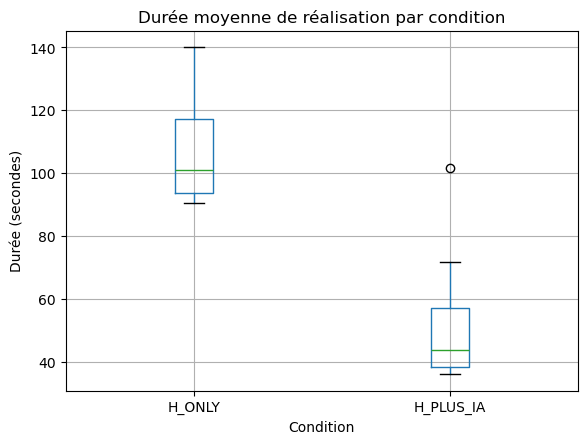

In [82]:
data_h1 = sessions[["condition", "mean_duration_s"]]

plt.figure()
data_h1.boxplot(by="condition", column="mean_duration_s")
plt.suptitle("")
plt.title("Durée moyenne de réalisation par condition")
plt.ylabel("Durée (secondes)")
plt.xlabel("Condition")
plt.show()

### Interprétation – H1

Les participants en condition *Avec IA* présentent une durée moyenne de réalisation nettement inférieure à celle observée en condition *Sans IA*.

Le test de Mann–Whitney indique que cette différence est statistiquement significative (p < 0.01), avec une taille d’effet très importante. Ces résultats suggèrent que l’assistance par IA permet de réduire fortement
le temps nécessaire pour accomplir la tâche de dessin.

## H2 — Nombre de corrections plus faible avec IA

Variables testées (niveau session) :
- `mean_corrections` : nombre moyen de corrections par essai.
- `mean_correction_ratio` : corrections / actions, pour tenir compte du volume d’activité.

In [83]:
h2a = two_group_mwu(
    df=sessions,
    group_col="condition",
    value_col="mean_corrections",
    g1="H_ONLY",
    g2="H_PLUS_IA"
)

results["H2_mean_corrections"] = h2a
pd.DataFrame([h2a])

,value_col,group_col,g1,g2,n_g1,n_g2,mean_g1,mean_g2,median_g1,median_g2,test,stat,pval,effect,effect_name
0,mean_corrections,condition,H_ONLY,H_PLUS_IA,8,9,3.208333,0.666667,2.666667,0.333333,mann_whitney,58.5,0.032624,0.625,Rank-biserial corr (RBC)


<Figure size 640x480 with 0 Axes>

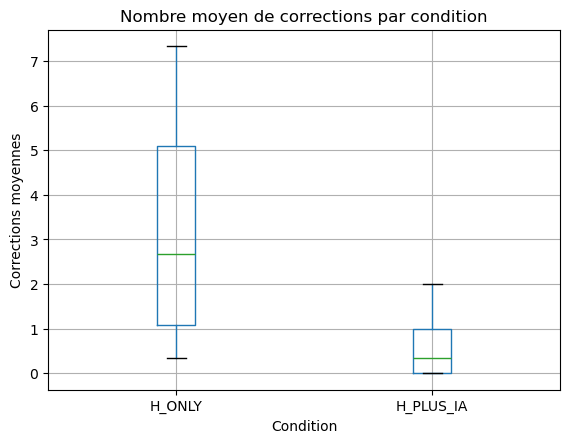

In [84]:
data_h2 = sessions[["condition", "mean_corrections"]]

plt.figure()
data_h2.boxplot(by="condition", column="mean_corrections")
plt.suptitle("")
plt.title("Nombre moyen de corrections par condition")
plt.ylabel("Corrections moyennes")
plt.xlabel("Condition")
plt.show()

### Interprétation – H2 (nombre de corrections)

Les participants disposant de l’assistance par IA effectuent en moyenne moins de corrections que ceux en condition *Sans IA*.

Le test de Mann–Whitney met en évidence une différence statistiquement significative (p < 0.05), associée à une taille d’effet importante. Ce résultat suggère que l’IA contribue à réduire le besoin de modifier ou corriger
le dessin en cours de réalisation.

In [85]:
h2b = two_group_mwu(
    df=sessions,
    group_col="condition",
    value_col="mean_correction_ratio",
    g1="H_ONLY",
    g2="H_PLUS_IA"
)

results["H2_mean_correction_ratio"] = h2b
pd.DataFrame([h2b])

,value_col,group_col,g1,g2,n_g1,n_g2,mean_g1,mean_g2,median_g1,median_g2,test,stat,pval,effect,effect_name
0,mean_correction_ratio,condition,H_ONLY,H_PLUS_IA,8,9,0.150911,0.067137,0.139621,0.047619,mann_whitney,51.0,0.161646,0.416667,Rank-biserial corr (RBC)


### Analyse de robustesse – H2 (ratio corrections / actions)

Lorsque l’on rapporte le nombre de corrections au volume d’actions réalisées, la différence entre conditions n’est plus statistiquement significative.

Ce résultat suggère que la diminution du nombre de corrections observée avec IA est en partie liée à une réduction globale de l’activité de dessin, plutôt qu’à une modification systématique de la stratégie de correction.

## H3 — Usage de l’IA selon la tâche

L’hypothèse H3 stipule que l’assistance par IA est utilisée différemment selon le type de tâche de dessin (chat, château, voiture).

Contrairement aux hypothèses H1 et H2, cette analyse porte uniquement sur la condition *Avec IA* et repose sur une comparaison **intra-participant** : chaque utilisateur réalise l’ensemble des tâches.

In [86]:
# Essais réalisés avec IA uniquement
trials_ai = trials[trials["condition"] == "H_PLUS_IA"].copy()

trials_ai["task_id"].value_counts()

task_id
car       9
castle    9
cat       9
Name: count, dtype: int64

### Statistiques descriptives par tâche

Nous commençons par examiner comment l’IA est utilisée pour chaque tâche, sans effectuer de test statistique.

Ces descriptifs permettent d’identifier d’éventuelles tendances générales et facilitent l’interprétation des analyses ultérieures.

In [87]:
desc_h3 = (
    trials_ai
    .groupby("task_id")
    .agg(
        n_trials=("session_id", "size"),
        mean_ia_events=("n_ia_events", "mean"),
        median_ia_events=("n_ia_events", "median"),
        mean_gen_add=("n_gen_add", "mean"),
        median_gen_add=("n_gen_add", "median"),
        prop_ai_used=("ai_used", "mean"),
    )
)

desc_h3

,n_trials,mean_ia_events,median_ia_events,mean_gen_add,median_gen_add,prop_ai_used
task_id,,,,,,
car,9,2.333333,2.0,2.222222,2.0,1.0
castle,9,5.444444,6.0,1.000000,1.0,1.0
cat,9,5.444444,2.0,0.000000,0.0,1.0


### Choix du test statistique

Pour tester l’hypothèse H3 de manière simple et robuste, nous comparons l’usage de l’IA entre deux tâches à la fois, au sein des mêmes participants.

Nous utilisons le test de **Wilcoxon signé-rang**, qui est :
- non paramétrique ;
- adapté aux comparaisons intra-participant ;
- robuste pour de petits effectifs.

Afin de limiter la complexité et les problèmes liés aux dépendances logicielles, nous nous concentrons sur une comparaison clé : **voiture vs château**, qui correspond aux tâches les plus structurées.

In [88]:
# Table wide : 1 ligne = participant, 1 colonne = tâche
wide_h3 = trials_ai.pivot_table(
    index="session_id",
    columns="task_id",
    values="n_gen_add",
    aggfunc="mean"
)

wide_h3.head()

task_id,car,castle,cat
session_id,,,
0cb582a3-2753-47ef-96ad-5fad4d0514f4,3.0,1.0,0.0
275b8f17-1e76-46f1-99d6-aca6d9f0d9b1,2.0,1.0,0.0
46a6b659-787c-4232-be84-bb46a3b814b0,2.0,1.0,0.0
77d8e68f-d0b1-4183-9993-2bfcb26938a5,3.0,1.0,0.0
83353450-e97d-464b-a7c8-cd49976c5ebd,2.0,1.0,0.0


In [91]:
# Participants ayant les deux tâches comparées
wide_h3_pair = wide_h3[["car", "castle"]].dropna()

wide_h3_pair.shape

(9, 2)

In [93]:
wilcoxon_h3 = pg.wilcoxon(
    wide_h3_pair["car"],
    wide_h3_pair["castle"],
    alternative="two-sided"
)

print(wilcoxon_h3)

          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0   two-sided  0.007812  1.0  0.944444


### Interprétation – H3

Le test de Wilcoxon signé-rang met en évidence une différence statistiquement significative dans l’usage de la génération IA entre les tâches *voiture* et *château* (p < 0.01).

La taille de l’effet est maximale (RBC = 1.0), ce qui indique que cette différence est systématique : pour l’ensemble des participants, l’usage de la génération IA varie dans le même sens entre ces deux tâches.

Ces résultats montrent que les participants adaptent leur recours à la génération IA en fonction du type de dessin à réaliser, ce qui soutient l’hypothèse H3.

## Synthèse

Les résultats de H1 et H2 ont été stockés le dictionnaire `results` suivant :

In [79]:
# Affichage compact : H1 & H2 (dict -> tableau)
summary_rows = []
for k in ["H1_mean_duration_s", "H2_mean_corrections", "H2_mean_correction_ratio"]:
    if k in results and isinstance(results[k], dict):
        summary_rows.append({
            "hypothesis": k,
            "test": results[k]["test"],
            "pval": results[k]["pval"],
            "effect": results[k]["effect"],
            "effect_name": results[k]["effect_name"],
            "mean_g1": results[k]["mean_g1"],
            "mean_g2": results[k]["mean_g2"],
            "median_g1": results[k]["median_g1"],
            "median_g2": results[k]["median_g2"],
            "n_g1": results[k]["n_g1"],
            "n_g2": results[k]["n_g2"],
        })

pd.DataFrame(summary_rows)

,hypothesis,test,pval,effect,effect_name,mean_g1,mean_g2,median_g1,median_g2,n_g1,n_g2
0,H1_mean_duration_s,mann_whitney,0.000987,0.888889,Rank-biserial corr (RBC),108.409083,52.983926,101.048333,43.752667,8,9
1,H2_mean_corrections,mann_whitney,0.032624,0.625000,Rank-biserial corr (RBC),3.208333,0.666667,2.666667,0.333333,8,9
2,H2_mean_correction_ratio,mann_whitney,0.161646,0.416667,Rank-biserial corr (RBC),0.150911,0.067137,0.139621,0.047619,8,9


### Synthèse – H3

Les analyses menées dans cette section indiquent que l’usage de l’IA n’est pas uniforme selon la tâche de dessin.

En particulier, la génération d’éléments par IA est utilisée de manière significativement différente entre les tâches *voiture* et *château*, avec un effet fort et systématique au niveau des participants.

Ces résultats apportent un éclairage comportemental complémentaire aux hypothèses H1 et H2, en montrant que les utilisateurs ajustent leur stratégie d’interaction avec l’IA en fonction des caractéristiques de la tâche à accomplir.

## Conclusion des analyses

Les analyses réalisées permettent de conclure que :

- l’assistance par IA est associée à une réduction marquée du temps de réalisation (H1) ;
- elle est également associée à une diminution du nombre brut de corrections (H2),
  bien que cet effet soit atténué lorsque l’on normalise par le volume d’actions ;
- l’usage de l’IA dépend fortement de la tâche de dessin (H3).